# **1. Summary of the Assignment**



**Project title :** Analyzing Regional Job Trends Across Industry Sectors in the United States

**Problem Definition:** Exploring the correlation between employment across various sectors and various economic factors such as (GDP, income index) over the past few years.

1. Identifying the sectors with highest and lowest employment volatility.
2. Studying the effect of economic events on jobs across sectors
3. Analyzing the rate of firm deaths (closures) across sectors and the trailing effect on GDP across states.

**Data source :** United States Census Bureau and Bureau of Economic Analytics :
  1. https://data.census.gov/table?q=business+dynamics&tid=BDSTIMESERIES.BDSGEO
  2. https://apps.bea.gov/itable/?ReqID=70&step=1&acrdn=1#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNi[…]JCZWdpbiIsIi0xIl0sWyJZZWFyX0VuZCIsIi0xIl1dfQ==

**Motivation :** As graduate students who are looking forward to employment in the US, analyzing sector-specific opportunities, job trends and state-level economic patterns will help us make informed career choices, ensuring we put our best foot forward.

# **2. Libraries required**

In [ ]:
#importing all packages needed

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import json
import plotly.express as px
from scipy.stats import linregress
import geopandas as gpd
import requests
from math import pi
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, CustomJS, Select
from bokeh.layouts import column
from bokeh.models import NumeralTickFormatter
import plotly.graph_objects as go
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
from bokeh.models.formatters import DatetimeTickFormatter



# **3. Viewing the datasets**




We have two data sets here
1. Business Dynamics Statistics across States (1978 - 2021)
2. GDP data across the States (1998 - 2022)

## 3.1 Description for Job data Columns
*   **Geographic Area Name** : Including all the states in the US.

*  **2017 NAICS Code** : A NAICS Code is a classification within the North American Industry Classification System. The NAICS System was developed for use by Federal Statistical Agencies for the collection, analysis and publication of statistical data related to the US Economy. For instance, naics code 11 equals to "Agriculture, forestry, fishing and hunting".

*   **Meaning of NAICS Code** : Sectors.

*   **Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator** :  Establishments located in Metropolitan or Micropolitan Statistical Areas are designated as in metro.

*   **Year** : The reference year for the data.

*   **Number of firms** : A firm is a business organization or entity consisting of one or more domestic establishments (locations) under common ownership or control.

*   **Number of establishments** : An establishment is a single physical location at which business is conducted.

*   **Number of employees** : The reference employees for the data.

*   **(DHS) denominator (DENOM)** : Davis-Haltiwanger-Schuh (DHS) denominator. For time t, (current year) denom is the average of employment for times t and t-1. This variable attempts to prevent transitory shocks from creating a bias in the relationship between net growth from t-1 to t and size.

*   **Number of establishments born during the last 12 months** : A count of establishments born during the last 12 months.

*   **Rate of establishments born during the last 12 months** : Equal to the number of establishments born during last 12 months divided by the average number of estabs in year t (current year) and year t-1 (prior year).

*   **Number of establishments exited during the last 12 months (ESTABS_EXIT)** : A count of establishments that exited during the last 12 months.

*   **Rate of establishments exited during the last 12 months (ESTABS_EXIT_RATE)** : Equal to the number of establishments that exited during last 12 months divided by the average number of estabs in year t (current year) and year t-1 (prior year).

*   **Number of jobs created from expanding and opening establishments during the last 12 months** : A count of all employment gains within the cell from expanding and opening establishments in the last 12 months.

*   **Number of jobs created from opening establishments during the last 12 months** : A count of jobs created from opening establishments during the last 12 months.

*   **Number of jobs created from expanding establishments during the last 12 months** : A count of jobs created from expanding establishments during the last 12 months.

*   **Rate of jobs created from opening establishments during the last 12 months** : Equal to the number of jobs created from opening establishments during the last 12 months divided by the average employment for time period t (current year) and time period t-1 (prior year).

*   **Rate of jobs created from expanding and opening establishments during the last 12 months** : Equal to the number of jobs created from expanding and opening establishments during the last 12 months divided by the average employment for time period t (current year) and time period t-1 (prior year).

*   **Number of jobs lost from contracting and closing establishments during the last 12 months** : A count of jobs lost from contracting and closing establishments during the last 12 months.

*   **Number of jobs lost from closing establishments during the last 12 months** : A count of jobs lost from closing establishments during the last 12 months.

*   **Number of jobs lost from contracting establishments during the last 12 months** : A count of jobs lost from contracting establishments during the last 12 months.

*   **Rate of jobs lost from closing establishments during the last 12 months** : Equal to the number of jobs lost from closing establishments during the last 12 months divided by the average employment for time period t (current year) and time period t-1 (prior year).

*   **Rate of jobs lost from contracting and closing establishments during the last 12 months** : Equal to the number of jobs lost from contracting and closing establishments during the last 12 months divided by the average employment for time period t (current year) and time period t-1 (prior year).

*   **Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months** : A count of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months. This is equal to job creation minus job destruction.

*   **Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months** : Equal to the number net jobs created from expanding/contracting and opening/closing establishments during the last 12 months divided by the average employment for time period t (current year) and time period t-1 (prior year).

*   **Rate of reallocation during the last 12 months** : A measure of the rate of job reallocation over and above that needed to accommodate the net job creation in the cell. Equal to job_creation_rate plus job_destruction_rate - absolute value(net_job_creation_rate).

*   **Number of firms that exited during the last 12 months** : A count of firms that exited during the last 12 months.

*   **Number of establishments associated with firm deaths during the last 12 months** : A count of establishments associated with firm deaths during the last 12 months.

*   **Number of employees associated with firm deaths during the last 12 months** : A count of employees associated with firm deaths during the last 12 months.


## 3.2 Description of GDP Information Columns

The description of the columns in the dataset is as follows:

* **GeoName** : Includes all the states
* **LineCode** : Code to identifty the name of the state
* **Description** : Includes various variables such as:
* **Real GDP_2012** : millions of chained 2012 dollars series, are calculated as the product of the chain-type quantity index and the 2012 current-dollar value of the corresponding series, divided by 100.
* **Real Dollar Statistics**: Includes Real GDP, Real Personal Income, Real * Personal Consumption Expenditure
* **Current Dollar Statistics** : Includes GDP, Personal Income, Disposable * Personal Income, Personal Consumption Expenditure
* **Real Per Capita Dollar Statistics** : Includes Real Per Capita Personal Income, Real Per Capita Personal Consumption Expenditure
* **Per Capita Current Dollar Statistics** : Includes Per Capita Personal Income, Per Capita Disposable Income, Per Capita Personal Consumption Expenditure
* **Price Indexes** : Includes Regional Price Parities, Implicit Regional Price Deflator
* **Employement** : Number of jobs
* **Years** : starting from 1998 to 2022

The dataset includes information about:

* State and Year wise information about Real GDP, Real Personal Income and Real Personal Consumption Expenditure, Disposable Personal Income, Per Capita Income and Expenditure
* State and Year wise information about the Regional Price Parities, Implicit Regional Price Deflator
* State and Year wise Number of jobs

Basic Information

* There are a total of 1105 rows
* There are a total of 29 columns
* There are 9700 null values

# **4. Data Preparation**



## 4.1 Sanity check of the  Business Dynamics Statistics across States (1978 - 2021) Dataset


In [ ]:
#Reading the datasets using pandas
dfa = pd.read_excel('https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/BDSTIMESERIES.BDSGEO-2023-09-20T171054.xlsx', sheet_name = 'Data')

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 29 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Geographic Area Name                                                                                                44720 non-null  object
 1   2017 NAICS Code                                                                                                     44720 non-null  object
 2   Meaning of NAICS Code                                                                                               44720 non-null  object
 3   Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator                        44720 non-null  object
 4   Year                  

Seems like there are no missing values in the data set.
But a lot of columns are set as objects which is not the best case for analysis. So we tried to transform them into floats upon which we encountered that there are some string values within a few columns.

We'll be transforming these values to Nan as the frequency of these values is very small(negligable).

Also, some columns have negative integers but the '-' symbol is in the format of unicode minus and we'll have to transform it to regular '-'.

In [ ]:
#Replacing values with nan
dfa=dfa.replace('D',np.nan)
dfa=dfa.replace('S',np.nan)

In [ ]:
#Replacing '-' values with proper minus symbol
dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace("−","-")
dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace(',', '').astype(str).astype(float)

dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace("−","-")
dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months']=dfa['Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months'].str.replace(',', '').astype(str).astype(float)

In [ ]:
#Creating a df_columns for columns of the dfa
dfa_columns=dfa.columns

#Converting to list
dfa_columns=list(dfa_columns)

#Considering columns with numerical values
dfa_columns=dfa_columns[5:]

#Removing all commas in the text and converting to float
for i in dfa_columns:
  if dfa[i].dtype==str:
    dfa[i]=dfa[i].str.replace(',', '').astype(str).astype(float)
  if dfa[i].dtype==object:
    dfa[i]=dfa[i].str.replace(',', '').astype(str).astype(float)

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44720 entries, 0 to 44719
Data columns (total 29 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Geographic Area Name                                                                                                44720 non-null  object 
 1   2017 NAICS Code                                                                                                     44720 non-null  object 
 2   Meaning of NAICS Code                                                                                               44720 non-null  object 
 3   Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator                        44720 non-null  object 
 4   Year            

Upon transforming the columns into floats and replacing strings in a few a columns which are irrelevant with Nan, we now have null values spread across.



## 4.2 Sanity check of the  GDP data across the States (1998 - 2022) Dataset


In [ ]:
dfb = pd.read_excel('https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/GPD%20information%20-%20by%20state%20and%20year.xlsx', header = 1)
dfb.head()

Unnamed: 0     Unnamed: 1 Unnamed: 2  \
0  Bureau of Economic Analysis            NaN        NaN   
1                  State or DC            NaN        NaN   
2                          NaN            NaN        NaN   
3                      GeoFips        GeoName   LineCode   
4                        00000  United States        NaN   

               Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                     NaN        NaN        NaN        NaN        NaN   
1                     NaN        NaN        NaN        NaN        NaN   
2                     NaN        NaN        NaN        NaN        NaN   
3             Description       1998       1999       2000       2001   
4  Real dollar statistics        NaN        NaN        NaN        NaN   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  \
0        NaN        NaN  ...         NaN         NaN         NaN         NaN   
1        NaN        NaN  ...         NaN         NaN         NaN         NaN   
2        NaN        NaN  ...         NaN         NaN         NaN         NaN   
3       2002       2003  ...        2013        2014        2015        2016   
4        NaN        NaN  ...         NaN         NaN         NaN         NaN   

  Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27 Unnamed: 28  
0         NaN         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN         NaN  
3        2017        2018        2019        2020        2021        2022  
4         NaN         NaN         NaN         NaN         NaN         NaN  

[5 rows x 29 columns]

In [ ]:
#Droping the first 4 columns to set the right column names

df0 = dfb.drop(range(3))
df0.columns = df0.iloc[0]
df0 = df0.reset_index(drop=True)
df0 = df0.drop(0)
df0.head(20)

3  GeoFips        GeoName LineCode  \
1    00000  United States      NaN   
2    00000  United States        1   
3    00000  United States        2   
4    00000  United States        3   
5    00000  United States      NaN   
6    00000  United States        4   
7    00000  United States        5   
8    00000  United States        6   
9    00000  United States        7   
10   00000  United States      NaN   
11   00000  United States        8   
12   00000  United States        9   
13   00000  United States      NaN   
14   00000  United States       10   
15   00000  United States       11   
16   00000  United States       12   
17   00000  United States      NaN   
18   00000  United States       13   
19   00000  United States       14   
20   00000  United States      NaN   

3                                         Description       1998       1999  \
1                              Real dollar statistics        NaN        NaN   
2      Real GDP (millions of chained 2012 dollars) 1/   12045824   12623361   
3     Real personal income (millions of constant (...       (NA)       (NA)   
4     Real PCE (millions of constant (2012) dollar...       (NA)       (NA)   
5     Current dollar statistics (millions of dollars)        NaN        NaN   
6                        Gross domestic product (GDP)    9062817    9631172   
7                                     Personal income    7601594    8006585   
8                          Disposable personal income    6570164    6895701   
9                   Personal consumption expenditures  5877248.2  6283757.5   
10  Real per capita dollar statistics (constant 20...        NaN        NaN   
11                 Real per capita personal income 4/       (NA)       (NA)   
12                             Real per capita PCE 5/       (NA)       (NA)   
13               Per capita current dollar statistics        NaN        NaN   
14                      Per capita personal income 6/      27557      28693   
15           Per capita disposable personal income 7/      23818      24712   
16    Per capita personal consumption expenditures...      21306      22519   
17                                      Price indexes        NaN        NaN   
18                  Regional price parities (RPPs) 9/       (NA)       (NA)   
19               Implicit regional price deflator 10/       (NA)       (NA)   
20                                         Employment        NaN        NaN   

3        2000      2001       2002       2003  ...        2013        2014  \
1         NaN       NaN        NaN        NaN  ...         NaN         NaN   
2    13138035  13263417   13488357   13865519  ...    16553348    16932051   
3        (NA)      (NA)       (NA)       (NA)  ...  13999660.3  14549525.5   
4        (NA)      (NA)       (NA)       (NA)  ...  11211711.4  11515312.3   
5         NaN       NaN        NaN        NaN  ...         NaN         NaN   
6    10250952  10581929   10929108   11456450  ...    16843196    17550687   
7     8654561   9009842    9157682    9491393  ...    14189228    14969527   
8     7419311   7771915    8106499    8488947  ...    12515000    13187189   
9   6767179.3   7073801  7348940.8  7740749.4  ...  11363527.8  11847725.1   
10        NaN       NaN        NaN        NaN  ...         NaN         NaN   
11       (NA)      (NA)       (NA)       (NA)  ...       44200       45571   
12       (NA)      (NA)       (NA)       (NA)  ...       35398       36068   
13        NaN       NaN        NaN        NaN  ...         NaN         NaN   
14      30672     31617      31839      32717  ...       44798       46887   
15      26294     27273      28184      29261  ...       39512       41304   
16      23983     24823      25550      26682  ...       35877       37109   
17        NaN       NaN        NaN        NaN  ...         NaN         NaN   
18       (NA)      (NA)       (NA)       (NA)  ...         100         100   
19       (NA)      (NA)       (NA)       (NA)  ...        (

In [ ]:
df0.shape

(1105, 29)

In [ ]:
 # Eliminating all the blank spaces of this table
df0["Description"] = df0["Description"].str.strip()

Since we only need the Real GDP for our analysis.

In [ ]:
df_1 = df0[df0["Description"]=="Gross domestic product (GDP)"]
df_2 = df0[df0["Description"]=="Per capita personal income 6/"]

In [ ]:
print(df_1.shape)

(52, 29)


In [ ]:
# We have to transform all the years columns into 1, that will be named as years
# We will create a new column that we will name (Real GDP)
df_1= df_1.melt(id_vars=["GeoName"], value_vars=['1998','1999','2000','2001','2002','2003',
'2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013','2014','2015','2016',
'2017', '2018', '2019', '2020','2021','2022' ], var_name='Year', value_name='GDP')

df_2= df_2.melt(id_vars=["GeoName"], value_vars=['1998','1999','2000','2001','2002','2003',
'2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013','2014','2015','2016',
'2017', '2018', '2019', '2020','2021','2022' ], var_name='Year', value_name='Per capita personal income')


In [ ]:
df_2 = df_2.replace("(NA)", np.nan)
df_1 = df_1.replace("(NA)", np.nan)

In [ ]:
#Transforming the object columns into floats
df_1["GDP"] = df_1["GDP"].astype(float)
df_1["Year"] = df_1["Year"].astype(float)
df_2["Per capita personal income"] = df_2["Per capita personal income"].astype(float)
df_2["Year"] = df_1["Year"].astype(float)

In [ ]:
df_3 = df_1.merge(df_2, on = ["GeoName","Year"])
df_3.head(10)

GeoName    Year        GDP  Per capita personal income
0         United States  1998.0  9062817.0                     27557.0
1               Alabama  1998.0   110212.0                     22668.0
2                Alaska  1998.0    24227.5                     29255.0
3               Arizona  1998.0   143302.6                     24173.0
4              Arkansas  1998.0    62396.7                     21208.0
5            California  1998.0  1147520.4                     29092.0
6              Colorado  1998.0   150330.0                     29901.0
7           Connecticut  1998.0   145475.5                     37827.0
8              Delaware  1998.0    37106.0                     29472.0
9  District of Columbia  1998.0    54815.3                     38122.0

In [ ]:
#Renaming the column name in coherence to the first dataset
df_3.columns = ['Geographic Area Name', 'Year', 'GDP', 'Per capita personal income' ]

In [ ]:
#Checking the description of the dataset
df_1.describe()

Year           GDP
count  1300.000000  1.300000e+03
mean   2010.000000  6.044562e+05
std       7.213878  2.244569e+06
min    1998.000000  1.484020e+04
25%    2004.000000  7.394568e+04
50%    2010.000000  1.857252e+05
75%    2016.000000  3.905732e+05
max    2022.000000  2.546272e+07

## 4.3 Merging the Datasets
Now we have both the data sets cleaned and organized for the analyisis we wish to carry out. The next step is to merge these datasets for ease of analysis.

In [ ]:
#Merging the datasets
df_merged = dfa.merge(df_3, how="left",on=["Geographic Area Name", "Year"])

In [ ]:
#Sorting the data based on Years
df_merged.head(5).sort_values(by = "Year", ascending = False)

Geographic Area Name 2017 NAICS Code  Meaning of NAICS Code  \
4        United States              00  Total for all sectors   
3        United States              00  Total for all sectors   
2        United States              00  Total for all sectors   
1        United States              00  Total for all sectors   
0        United States              00  Total for all sectors   

  Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator  \
4                                              Total                                             
3                                              Total                                             
2                                              Total                                             
1                                              Total                                             
0                                              Total                                             

   Year  Number of firms  Number of establishments  Number of employees  \
4  1982        3741519.0                 4616580.0           74700325.0   
3  1981        3768026.0                 4613001.0           75559277.0   
2  1980        3739132.0                 4553278.0           74885222.0   
1  1979        3691332.0                 4484523.0           74428886.0   
0  1978        3558241.0                 4324780.0           69968366.0   

   (DHS) denominator  Number of establishments born during the last 12 months  \
4         75072645.0                                           571755.0         
3         75212259.0                                           585422.0         
2         74648671.0                                           579032.0         
1         72294786.0                                           616164.0         
0         67389489.0                                           640222.0         

   ...  \
4  ...   
3  ...   
2  ...   
1  ...   
0  ...   

   Rate of jobs lost from closing establishments during the last 12 months  \
4                                              5.103                         
3                                              4.638                         
2                                              4.571                         
1                                              4.499                         
0                                              5.287                         

   Rate of jobs lost from contracting and closing establishments during the last 12 months  \
4                                             16.685                                         
3                                             15.135                                         
2                                             15.141                                         
1                                             13.001                                         
0                                             13.456                                         

   Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months  \
4                                          -735210.0                                                                    
3                                           698980.0                                                                    
2                                           471159.0                                                                    
1                                          4273421.0                                                                    
0                                          5158096.0                                                                    

   Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months  \
4                                             -0.979                                                                  
3                       

In [ ]:
#Adding Regions
#Define a dictionary to map states to official U.S. regions
state_region_map = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast', 'Vermont': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast',
    'Pennsylvania': 'Northeast', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest', 'Ohio': 'Midwest',
    'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Delaware': 'South', 'Florida': 'South',
    'Georgia': 'South', 'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South',
    'District of Columbia': 'South', 'West Virginia': 'South', 'Alabama': 'South', 'Kentucky': 'South', 'Mississippi': 'South',
    'Tennessee': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arizona': 'West',
    'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West',
    'Wyoming': 'West', 'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West', 'Washington': 'West'}

#Apply the mapping to create a new 'Region' column
df_merged['Region'] = df_merged['Geographic Area Name'].map(state_region_map)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44720 entries, 0 to 44719
Data columns (total 32 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Geographic Area Name                                                                                                44720 non-null  object 
 1   2017 NAICS Code                                                                                                     44720 non-null  object 
 2   Meaning of NAICS Code                                                                                               44720 non-null  object 
 3   Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator                        44720 non-null  object 
 4   Year            

In [ ]:
df_merged.head()

Geographic Area Name 2017 NAICS Code  Meaning of NAICS Code  \
0        United States              00  Total for all sectors   
1        United States              00  Total for all sectors   
2        United States              00  Total for all sectors   
3        United States              00  Total for all sectors   
4        United States              00  Total for all sectors   

  Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator  \
0                                              Total                                             
1                                              Total                                             
2                                              Total                                             
3                                              Total                                             
4                                              Total                                             

   Year  Number of firms  Number of establishments  Number of employees  \
0  1978        3558241.0                 4324780.0           69968366.0   
1  1979        3691332.0                 4484523.0           74428886.0   
2  1980        3739132.0                 4553278.0           74885222.0   
3  1981        3768026.0                 4613001.0           75559277.0   
4  1982        3741519.0                 4616580.0           74700325.0   

   (DHS) denominator  Number of establishments born during the last 12 months  \
0         67389489.0                                           640222.0         
1         72294786.0                                           616164.0         
2         74648671.0                                           579032.0         
3         75212259.0                                           585422.0         
4         75072645.0                                           571755.0         

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   Rate of jobs lost from contracting and closing establishments during the last 12 months  \
0                                             13.456                                         
1                                             13.001                                         
2                                             15.141                                         
3                                             15.135                                         
4                                             16.685                                         

   Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months  \
0                                          5158096.0                                                                    
1                                          4273421.0                                                                    
2                                           471159.0                                                                    
3                                           698980.0                                                                    
4                                          -735210.0                                                                    

   Rate of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months  \
0                                              7.654                                                                  
1                                              5.911                                                                  
2                                              0.631                                                                  
3                                              0.929                                                                  
4                                             -0.979                                                                  

   Rate of reall

### 4.3.1 Missing Value Matrix

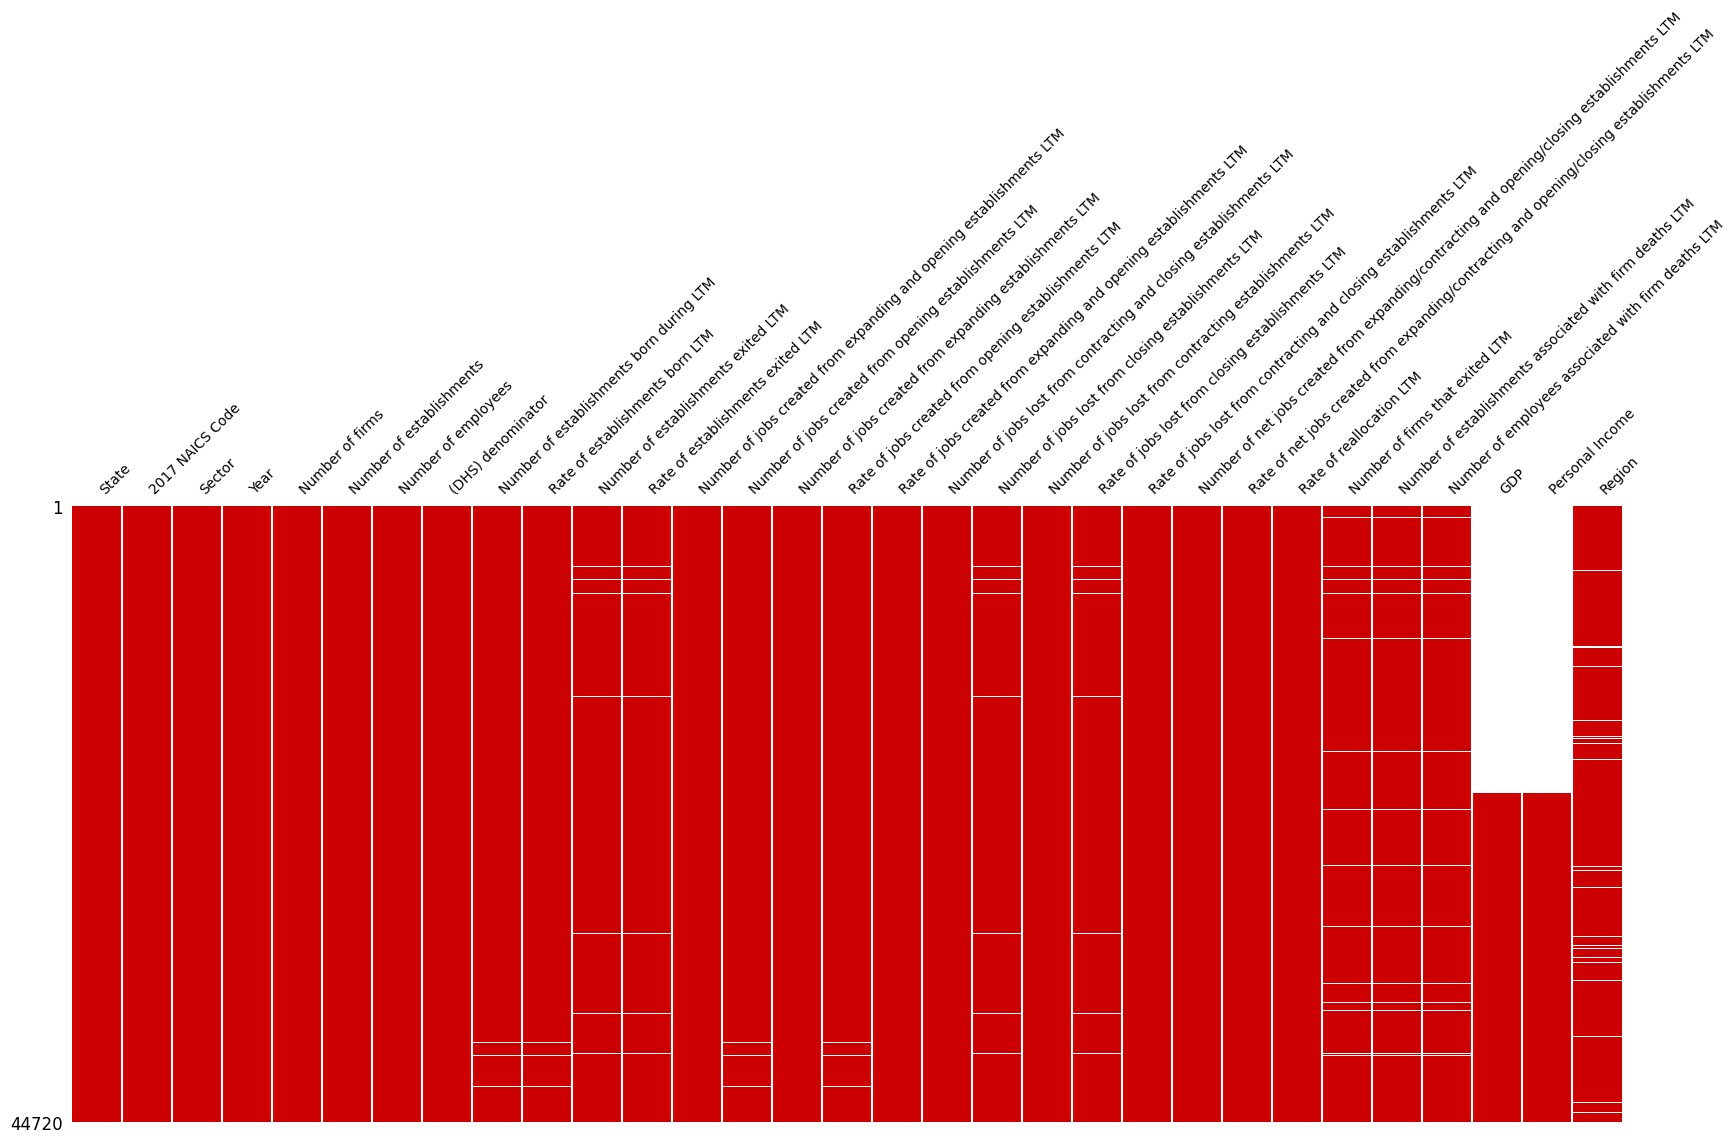

In [ ]:
sorted_df_merged = df_merged.sort_values(by="Year")
sorted_df_merged = sorted_df_merged.drop(columns=["Meaning of Establishments located in Metropolitan or Micropolitan Statistical Area indicator"])
sorted_df_merged.columns = ['State', '2017 NAICS Code', 'Sector', "Year", "Number of firms", "Number of establishments", "Number of employees","(DHS) denominator", "Number of establishments born during LTM", "Rate of establishments born LTM",
"Number of establishments exited LTM", "Rate of establishments exited LTM", "Number of jobs created from expanding and opening establishments LTM", "Number of jobs created from opening establishments LTM",
"Number of jobs created from expanding establishments LTM","Rate of jobs created from opening establishments LTM", "Rate of jobs created from expanding and opening establishments LTM",
"Number of jobs lost from contracting and closing establishments LTM", "Number of jobs lost from closing establishments LTM", "Number of jobs lost from contracting establishments LTM",
"Rate of jobs lost from closing establishments LTM", "Rate of jobs lost from contracting and closing establishments LTM", "Number of net jobs created from expanding/contracting and opening/closing establishments LTM",
"Rate of net jobs created from expanding/contracting and opening/closing establishments LTM", "Rate of reallocation LTM", "Number of firms that exited LTM","Number of establishments associated with firm deaths LTM",
"Number of employees associated with firm deaths LTM", "GDP", "Personal Income", "Region"]
msno.matrix(sorted_df_merged, n=1, p=1, figsize=(20, 8), fontsize=10, width_ratios=(10, 1), sort=None, filter=None, sparkline=False, color=(0.8, 0, 0))
plt.show()

**Insights from the Matrix**

#### A**dd a comment for the previous graph**

#**5. Data Exploration**

## 5.1 Trend of GDP over the time across States between 2000 and 2020

Moving forward with our analysis, we'll try to see which states have notable improvement in GDP relatively and try to answer the following question.

**Question - Which states have seen a noticible improvement in GDP between the years 2000 and 2020?**

In [ ]:
  #Loading the geojson file
  geojson_url = 'https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/us-states.json'

  #Reference from ChatGPT
  # Fetch the GeoJSON data from the URL
  response = requests.get(geojson_url)
  us_states = response.json()

  # Filter your DataFrame and convert 'Year' to a string
  filtered_data = df_merged.copy()
  filtered_data = filtered_data[(filtered_data["Geographic Area Name"] != "United States") &
                          (filtered_data["Meaning of NAICS Code"] != "Total for all sectors") &
                          (filtered_data["Year"] >= 2000)]
  filtered_data['Year'] = filtered_data['Year'].astype(str)

  # Converts geographic area names into corresponding codes for importing
  state_region_map = {
      "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA","Colorado":"CO","Connecticut":"CT","Delaware":"DE","Washington DC":"DC","Florida":"FL","Georgia":"GA","Hawaii":"HI","Idaho":"ID",
      "Illinois":"IL","Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY","Louisiana":"LA","Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI","Minnesota":"MN","Mississippi":"MS","Missouri":"MO",
      "Montana":"MT","Nebraska":"NE","Nevada":"NV","New Hampshire":"NH","New Jersey":"NJ","New Mexico":"NM","New York":"NY","North Carolina":"NC","North Dakota":"ND","Ohio":"OH","Oklahoma":"OK","Oregon":"OR",
      "Pennsylvania":"PA","Rhode Island":"RI","South Carolina":"SC","South Dakota":"SD","Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT","Virginia":"VA","Washington":"WA","West Virginia":"WV",
      "Wisconsin":"WI","Wyoming":"WY"}
  filtered_data['Geographic Area Name']=filtered_data['Geographic Area Name'].replace(state_region_map)

  #Reference from ChatGPT
  # Create the choropleth map
  fig = px.choropleth(
      filtered_data,
      locations="Geographic Area Name",
      locationmode="USA-states",
      geojson=us_states,
      color="GDP",
      scope="usa",  # Map scope (USA)
      hover_name="Geographic Area Name",
      color_continuous_scale="Reds",
      title="Figure 5.1: State-wise GDP",
      range_color=[0, 1000000],
      animation_frame='Year'
  );

fig.update_coloraxes(colorbar_title="GDP (USD Trillion)")

fig.show();


**Insights from the HeatMap**

The chart indicates that over the years, the states NY, CA, TX, and FL consistently have the highest GDP. Notably, FL has experienced nearly a 100% increase in GDP since 1998.

We'll further look to understand how has the the death of firms affected the GDP

## 5.2 Trend of Per Capita Personal Income over the time across States between 2000 and 2020

In [ ]:
#Loading the geojson file
geojson_url = 'https://github.com/ltrucios/BA780_GroupAssigment_Group09/raw/main/Datasets/us-states.json'

#Reference from ChatGPT
# Fetch the GeoJSON data from the URL
response = requests.get(geojson_url)
us_states = response.json()

# Filter your DataFrame and convert 'Year' to a string
filtered_data = df_merged.copy()
filtered_data = filtered_data[(filtered_data["Geographic Area Name"] != "United States") &
                              (filtered_data["Year"] >= 2000)]

filtered_data['Year'] = filtered_data['Year'].astype(str)

# Converts geographic area names into corresponding codes for importing
state_region_map = {
    "Alabama":"AL","Alaska":"AK","Arizona":"AZ","Arkansas":"AR","California":"CA","Colorado":"CO","Connecticut":"CT","Delaware":"DE","Washington DC":"DC","Florida":"FL","Georgia":"GA","Hawaii":"HI","Idaho":"ID",
    "Illinois":"IL","Indiana":"IN","Iowa":"IA","Kansas":"KS","Kentucky":"KY","Louisiana":"LA","Maine":"ME","Maryland":"MD","Massachusetts":"MA","Michigan":"MI","Minnesota":"MN","Mississippi":"MS","Missouri":"MO",
    "Montana":"MT","Nebraska":"NE","Nevada":"NV","New Hampshire":"NH","New Jersey":"NJ","New Mexico":"NM","New York":"NY","North Carolina":"NC","North Dakota":"ND","Ohio":"OH","Oklahoma":"OK","Oregon":"OR",
    "Pennsylvania":"PA","Rhode Island":"RI","South Carolina":"SC","South Dakota":"SD","Tennessee":"TN","Texas":"TX","Utah":"UT","Vermont":"VT","Virginia":"VA","Washington":"WA","West Virginia":"WV",
    "Wisconsin":"WI","Wyoming":"WY"}
filtered_data['Geographic Area Name']=filtered_data['Geographic Area Name'].replace(state_region_map)

#Reference from ChatGPT
# Create the choropleth map
fig = px.choropleth(
    filtered_data,
    locations="Geographic Area Name",
    locationmode="USA-states",
    geojson=us_states,
    color="Per capita personal income",
    scope="usa",  # Map scope (USA)
    hover_name="Geographic Area Name",
    color_continuous_scale="Reds",
    title="Figure 5.2: State-wise Per Capita Personal Income",
    range_color=[10000, 70000],
    animation_frame='Year'
)

fig.update_coloraxes(colorbar_title="Per Capita Personal Income (USD)")

fig.show()

**Insights from the Map**

#### A**dd a comment for the previous graph**

## 5.3 Trend of Per Capita Personal Income over the time across regions between 2000 and 2020

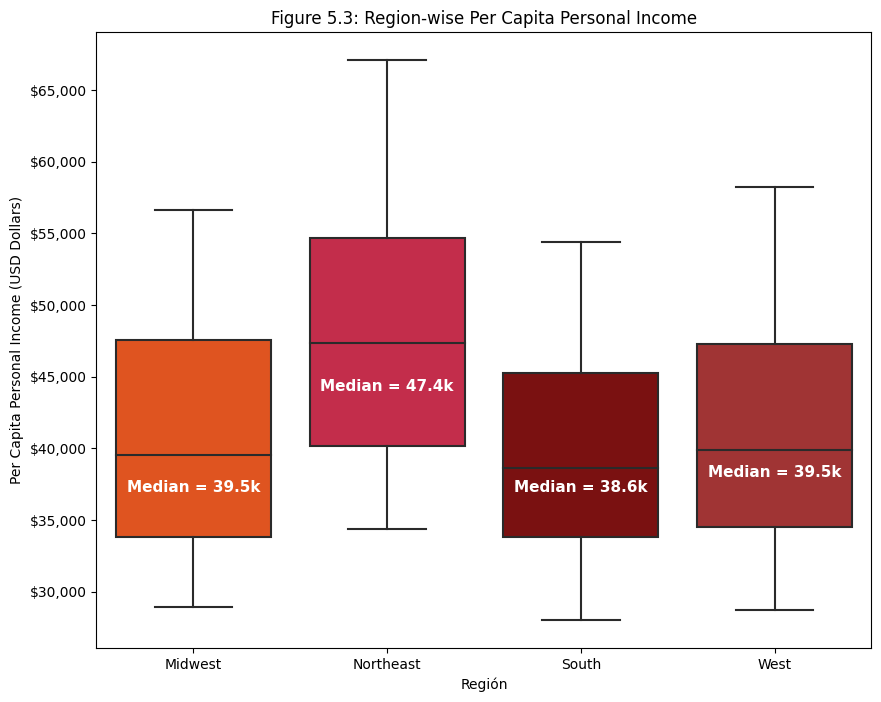

In [ ]:
income_data = df_merged[
    (df_merged["Geographic Area Name"] != "United States") &
    (df_merged["Meaning of NAICS Code"] != "Total for all sectors") &
    (df_merged["Year"] >= 2000)];
income_data = income_data.groupby(["Region", "Year"]).mean(numeric_only=True)
income_data['Per capita personal income'] = income_data['Per capita personal income'];
income_data = income_data.reset_index();

plt.figure(figsize=(10, 8))
palette = ['#FF4500', '#DC143C', '#8B0000', '#B22222', '#CD5C5C']

sns.boxplot(x='Region', y='Per capita personal income', data=income_data, palette=palette)
plt.title('Figure 5.3: Region-wise Per Capita Personal Income')
plt.xlabel('Región')
plt.ylabel('Per Capita Personal Income (USD Dollars)');
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter);


plt.text(x=0, y=37000, s='Median = 39.5k', fontsize=11, ha='center', color="white", weight = "bold")
plt.text(x=1, y=44000, s='Median = 47.4k', fontsize=11, ha='center', color="white", weight = "bold")
plt.text(x=2, y=37000, s='Median = 38.6k', fontsize=11, ha='center', color="white", weight = "bold")
plt.text(x=3, y=38000, s='Median = 39.5k', fontsize=11, ha='center', color="white", weight = "bold");

**Insights from the Box Plot**
#### A**dd a comment for the previous graph**

## 5.4 Firms Market Share by Regions over the years between 2000 and 2020

In [ ]:
import plotly.graph_objects as go

# Filter data for years 2000 to 2020
filtered_df = df_merged[(df_merged['Year'] >= 2000) & (df_merged['Year'] <= 2020)]

# Handle duplicates by aggregating (e.g., calculating the mean)
pivot_table = filtered_df.groupby(['Region', 'Year'])['Number of firms'].sum().unstack()

# Get the unique years from the pivot table
years = pivot_table.columns

# Convert years to strings
year_strings = [str(year) for year in years]

# Create frames for the animation
frames = [go.Frame(
    data=[
        go.Pie(
            labels=pivot_table.index,
            values=pivot_table[year],
            title=f'Year {year}',
            legendgroup='Firms by Region',
            name=year_str
        )
    ]
) for year, year_str in zip(years, year_strings)]

reds_palette = ['#FF4500', '#DC143C', '#8B0000', '#B22222', '#CD5C5C']


# Create the figure
fig = go.Figure(data=[
    go.Pie(
        labels=pivot_table.index,
        values=pivot_table[years[0]],
        title=f'Year {years[0]}',
        legendgroup='Firms by Region',
        name=year_strings[0],
        marker=dict(colors=reds_palette)
    )
], frames=frames)

# Define animation settings
animation_settings = dict(frame=dict(duration=1000, redraw=True), fromcurrent=True)

# Add animation buttons
fig.update_layout(updatemenus=[dict(type='buttons', showactive=False, buttons=[dict(label='Play', method='animate', args=[None, animation_settings])])])

fig.update_layout(title='Figure 5.4: Firms Market Share by Regions over the years between 2000 and 2020')
fig.update_layout(showlegend=True)  # Show the legend

# Display the animated pie chart
fig.show()

**Insights from the Pie Chart**
#### A**dd a comment for the previous graph**

## 5.5 Employees Market Share across Regions

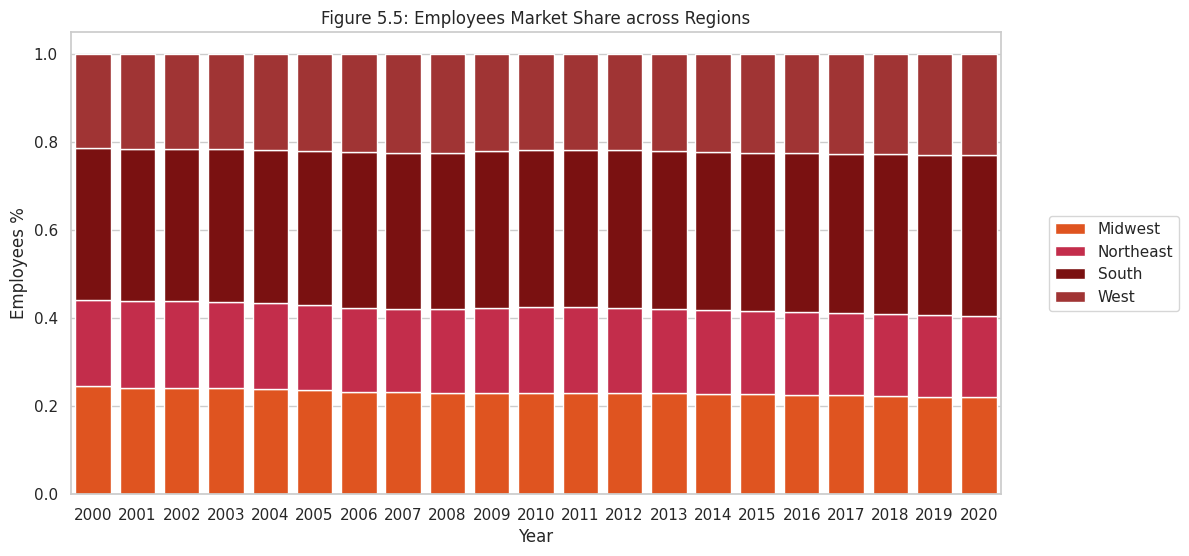

In [ ]:
regions_data_2 = df_merged[
    (df_merged["Geographic Area Name"] != "United States") &
    (df_merged["Meaning of NAICS Code"] != "Total for all sectors") &
    (df_merged["Year"] >= 2000)]

regions_data_2 = regions_data_2.groupby([ "Year", "Region"])["Number of employees"].sum()
regions_data_2 = pd.DataFrame(regions_data_2)

regions_data_2.reset_index()

regions_data_2['Employees_sum'] = regions_data_2.groupby('Year')['Number of employees'].transform('sum')

regions_data_2['Employees_%'] = regions_data_2["Number of employees"]/regions_data_2["Employees_sum"]

regions_data_2 = regions_data_2.reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


# Filtra y resetea los índices para cada región
regions_data_2_Midwest = regions_data_2[regions_data_2["Region"] == "Midwest"].reset_index()
regions_data_2_Northeast = regions_data_2[regions_data_2["Region"] == "Northeast"].reset_index()
regions_data_2_South = regions_data_2[regions_data_2["Region"] == "South"].reset_index()
regions_data_2_West = regions_data_2[regions_data_2["Region"] == "West"].reset_index()


# Calcula los valores acumulativos para las barras apiladas
bottom_values_northeast = regions_data_2_Midwest["Employees_%"].values
bottom_values_south = bottom_values_northeast + regions_data_2_Northeast["Employees_%"].values
bottom_values_west = bottom_values_south + regions_data_2_South["Employees_%"].values

# Crea el gráfico de barras apiladas
sns.barplot(x='Year', y="Employees_%", data=regions_data_2_Midwest, color='#FF4500', label='Midwest')
sns.barplot(x='Year', y="Employees_%", data=regions_data_2_Northeast, color='#DC143C', label='Northeast', bottom=bottom_values_northeast)
sns.barplot(x='Year', y="Employees_%", data=regions_data_2_South, color='#8B0000', label='South', bottom=bottom_values_south)
sns.barplot(x='Year', y="Employees_%", data=regions_data_2_West, color='#B22222', label='West', bottom=bottom_values_west)

# Personaliza el gráfico
plt.title('Figure 5.5: Employees Market Share across Regions')
plt.xlabel('Year')
plt.ylabel("Employees %")
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

# plt.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Muestra el gráfico
plt.show()

**Insights from the Stacked Bar Chart**
#### A**dd a comment for the previous graph**

## 5.6 Trend Analysis


Moving forward with the Analysis
we'll first try to plot charts to observe the corelation between important columns(Net Jobs Created, Real GDP, Number of Firms and Number of Employees) within the years 2000-2020.

With this approach we'll try to answer the following question.

**Question - What has been the behaviour of the Job Trends and Economy between 2000 and 2020 in the US?**

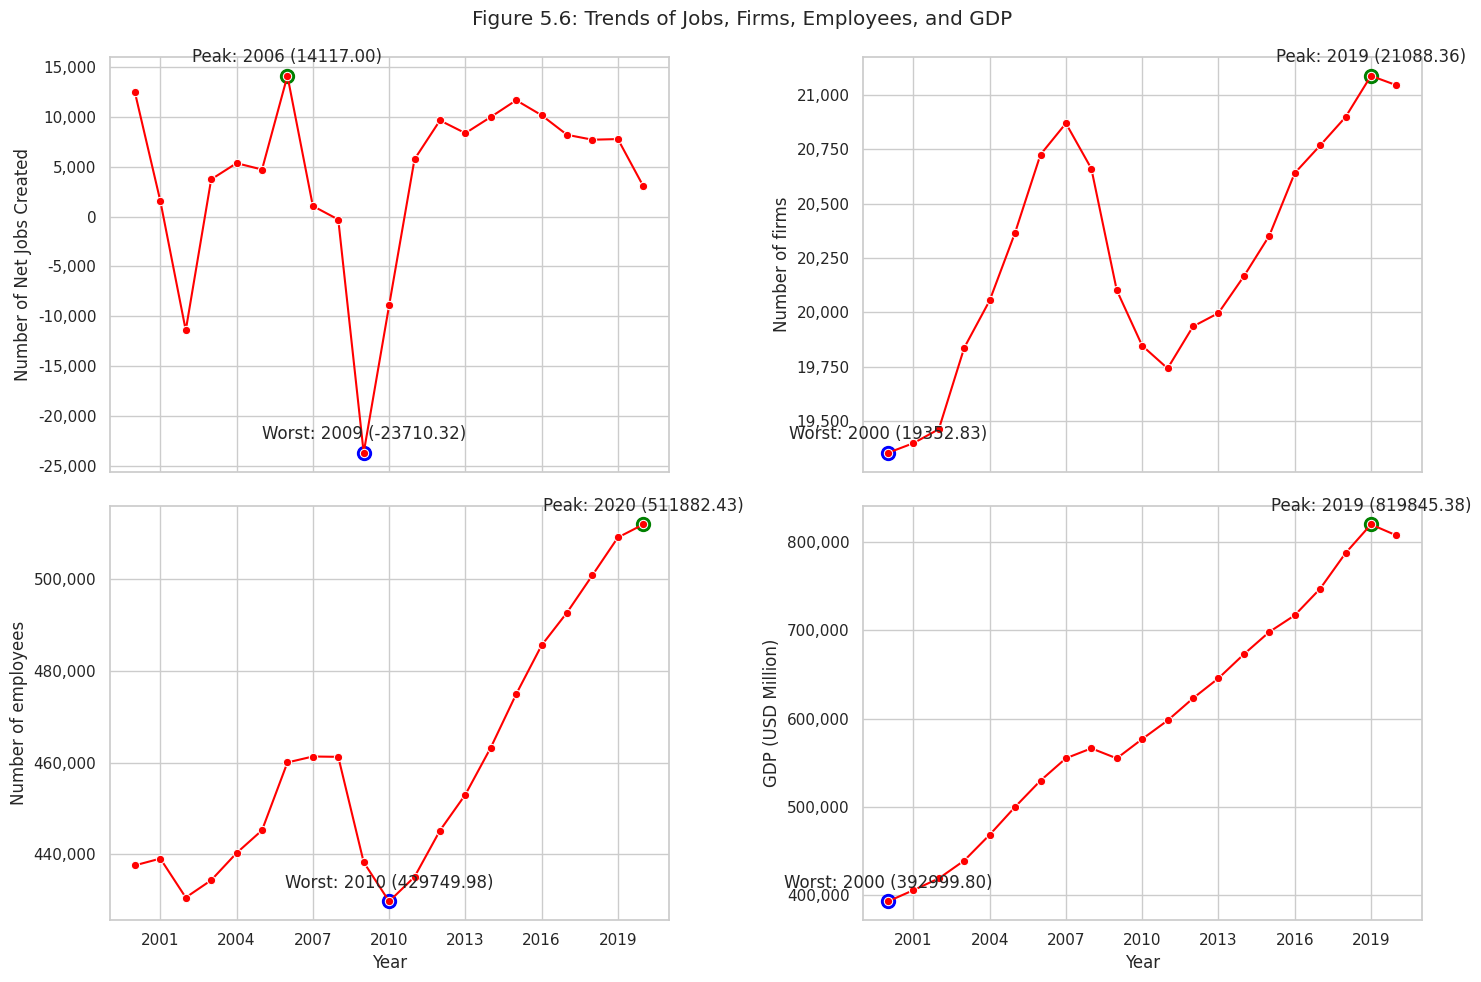

In [ ]:
#Exploring patterns within the years 2000-2020

# Choosing the years from 2000 to 2020
year_00_20 = df_merged[(df_merged["Year"] >= 2000) & (df_merged["Year"] <= 2020)]

# Plotting the trend of net jobs, number of firms, number of employees, and the Real GDP against the 20 years
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 10))
fig.suptitle('Figure 5.6: Trends of Jobs, Firms, Employees, and GDP')

sns.set_style('whitegrid')

# Plotting the data for each subplot
sns.lineplot(ax=axes[0][0], x='Year', y='Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months', data=year_00_20, color="red", errorbar=None, marker='o')
axes[0][0].set_ylabel('Number of Net Jobs Created')
axes[0][0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(ax=axes[0][1], x='Year', y='Number of firms', data=year_00_20, errorbar=None, marker='o', color="red")
axes[0][1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(ax=axes[1][0], x='Year', y='Number of employees', data=year_00_20, errorbar=None, marker='o', color="red")
axes[1][0].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(ax=axes[1][1], x='Year', y='GDP', data=year_00_20, errorbar=None, marker='o',color="red")
axes[1][1].set_ylabel('GDP (USD Million)')
axes[1][1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


#Reference from ChatGPT
# Finding the peak and worst years for each subplot
for ax in axes.flat:
    data = ax.get_lines()[0].get_data()
    peak_idx = data[1].argmax()
    worst_idx = data[1].argmin()
    peak_year = int(data[0][peak_idx])
    peak_value = data[1][peak_idx]
    worst_year = int(data[0][worst_idx])
    worst_value = data[1][worst_idx]

    # Highlighting the peak and worst years with larger green and red dots
    ax.scatter(peak_year, peak_value, color='green', s=100)
    ax.scatter(worst_year, worst_value, color='blue', s=100)
    ax.annotate(f'Peak: {peak_year} ({peak_value:.2f})', (peak_year, peak_value), textcoords="offset points", xytext=(0,10), ha='center')
    ax.annotate(f'Worst: {worst_year} ({worst_value:.2f})', (worst_year, worst_value), textcoords="offset points", xytext=(0,10), ha='center')

#Reference from ChatGPT
# Formating x-axis labels
for ax in axes.flat:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Displaying the plot
plt.tight_layout()
plt.show()

**Insights from the subplots**

From the graph we find that there is a sharp dip in the years from 2008-2010 which is consistent with the 2008 Recession in the US.

The first impact of the recession was on the GDP followed by the jobs.

**Hence, answering the first question - Though the net jobs and economy have seen a dip during a few years, GDP, Number of firms and employees have grown compared to year 2000. But the number of net jobs introduced each year has not seen a good enough relative growth compared to year 2000**

Now further zooming in to the period of 2006 to 2012 to study the effect of 2008 Recession on various other features.

# **6. Identifying the Sectors with highest and lowest Employment Volatility**



## 6.1 Volatility across Sectors

**Question - Which sectors were the least and most volatile in terms of jobs across the years which involve the recession?**
In other terms, which sectors were least and most affected by the recession.

In [ ]:
year_00_20 = df_merged[(df_merged["Year"]>=2000)&(df_merged["Year"]<=2020)]

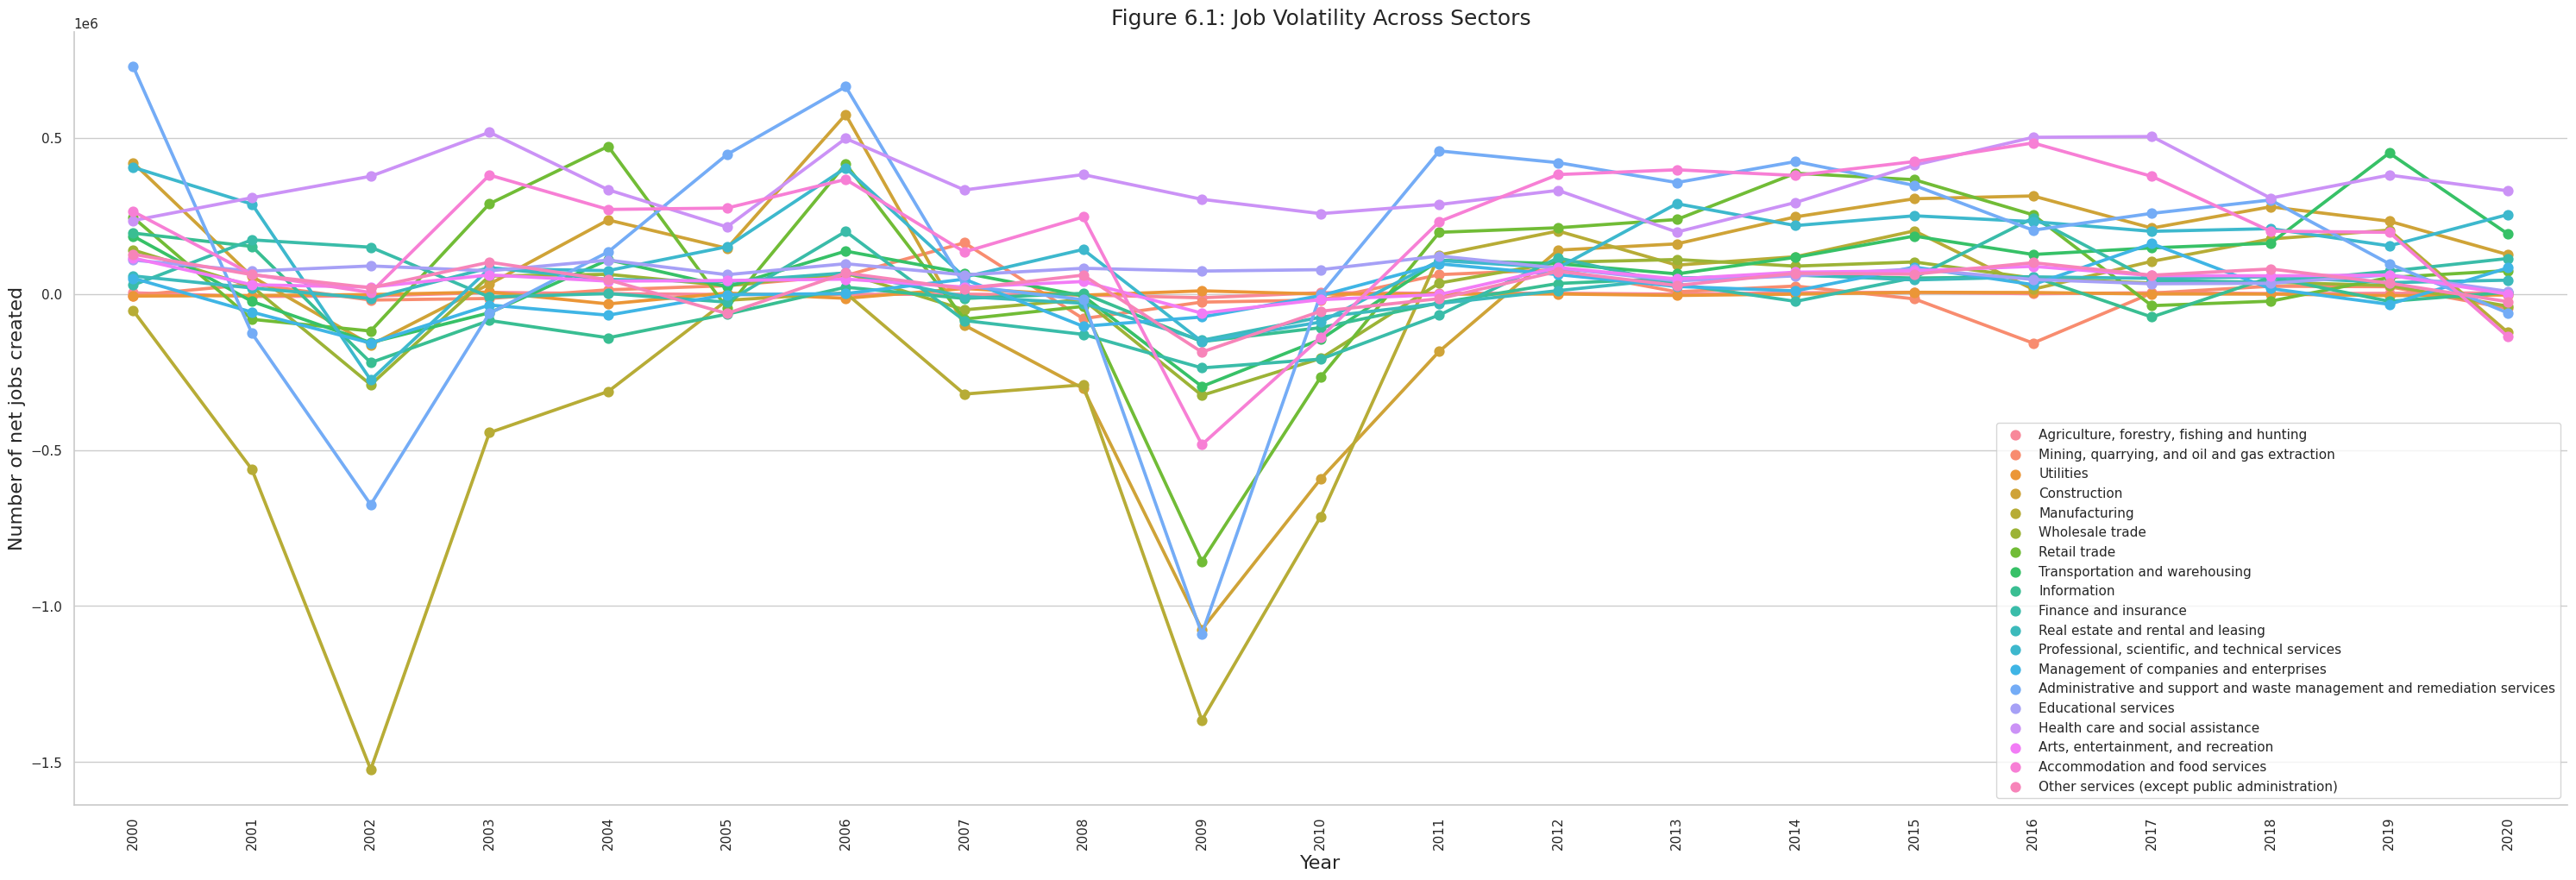

In [ ]:
df_jobs_effect=year_00_20[year_00_20["Geographic Area Name"] == "United States"]
df_jobs_effect=df_jobs_effect[df_jobs_effect['Meaning of NAICS Code']!='Total for all sectors']
df_jobs_effect_srt=df_jobs_effect.sort_values(by='Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months', ascending = False)
fig=sns.catplot(x='Year',
                y='Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months',
                data=df_jobs_effect,
                hue='Meaning of NAICS Code',
                kind='point', height=10,
                aspect=3,errorbar=None, legend=False);
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of net jobs created', fontsize=16)
plt.title("Figure 6.1: Job Volatility Across Sectors", fontsize=18)
fig.set_xticklabels(rotation=90);
fig.ax.legend(title="Sectors", fontsize=12, title_fontsize=14)
plt.legend(loc="lower right", bbox_to_anchor=(1,0));

**Insights  from the line plot**

We see that the Administrative sector has the most volatile employment during the recession followed by Manufacturing, Construction.

While it is noticible that various sectors have visible volataility, the graph is not readable due to messy lines. We'll look further to plot the std deviation on a bar plot for better understanding

## 6.2 Identifying the Sectors with highest and lowest Employment Volatility


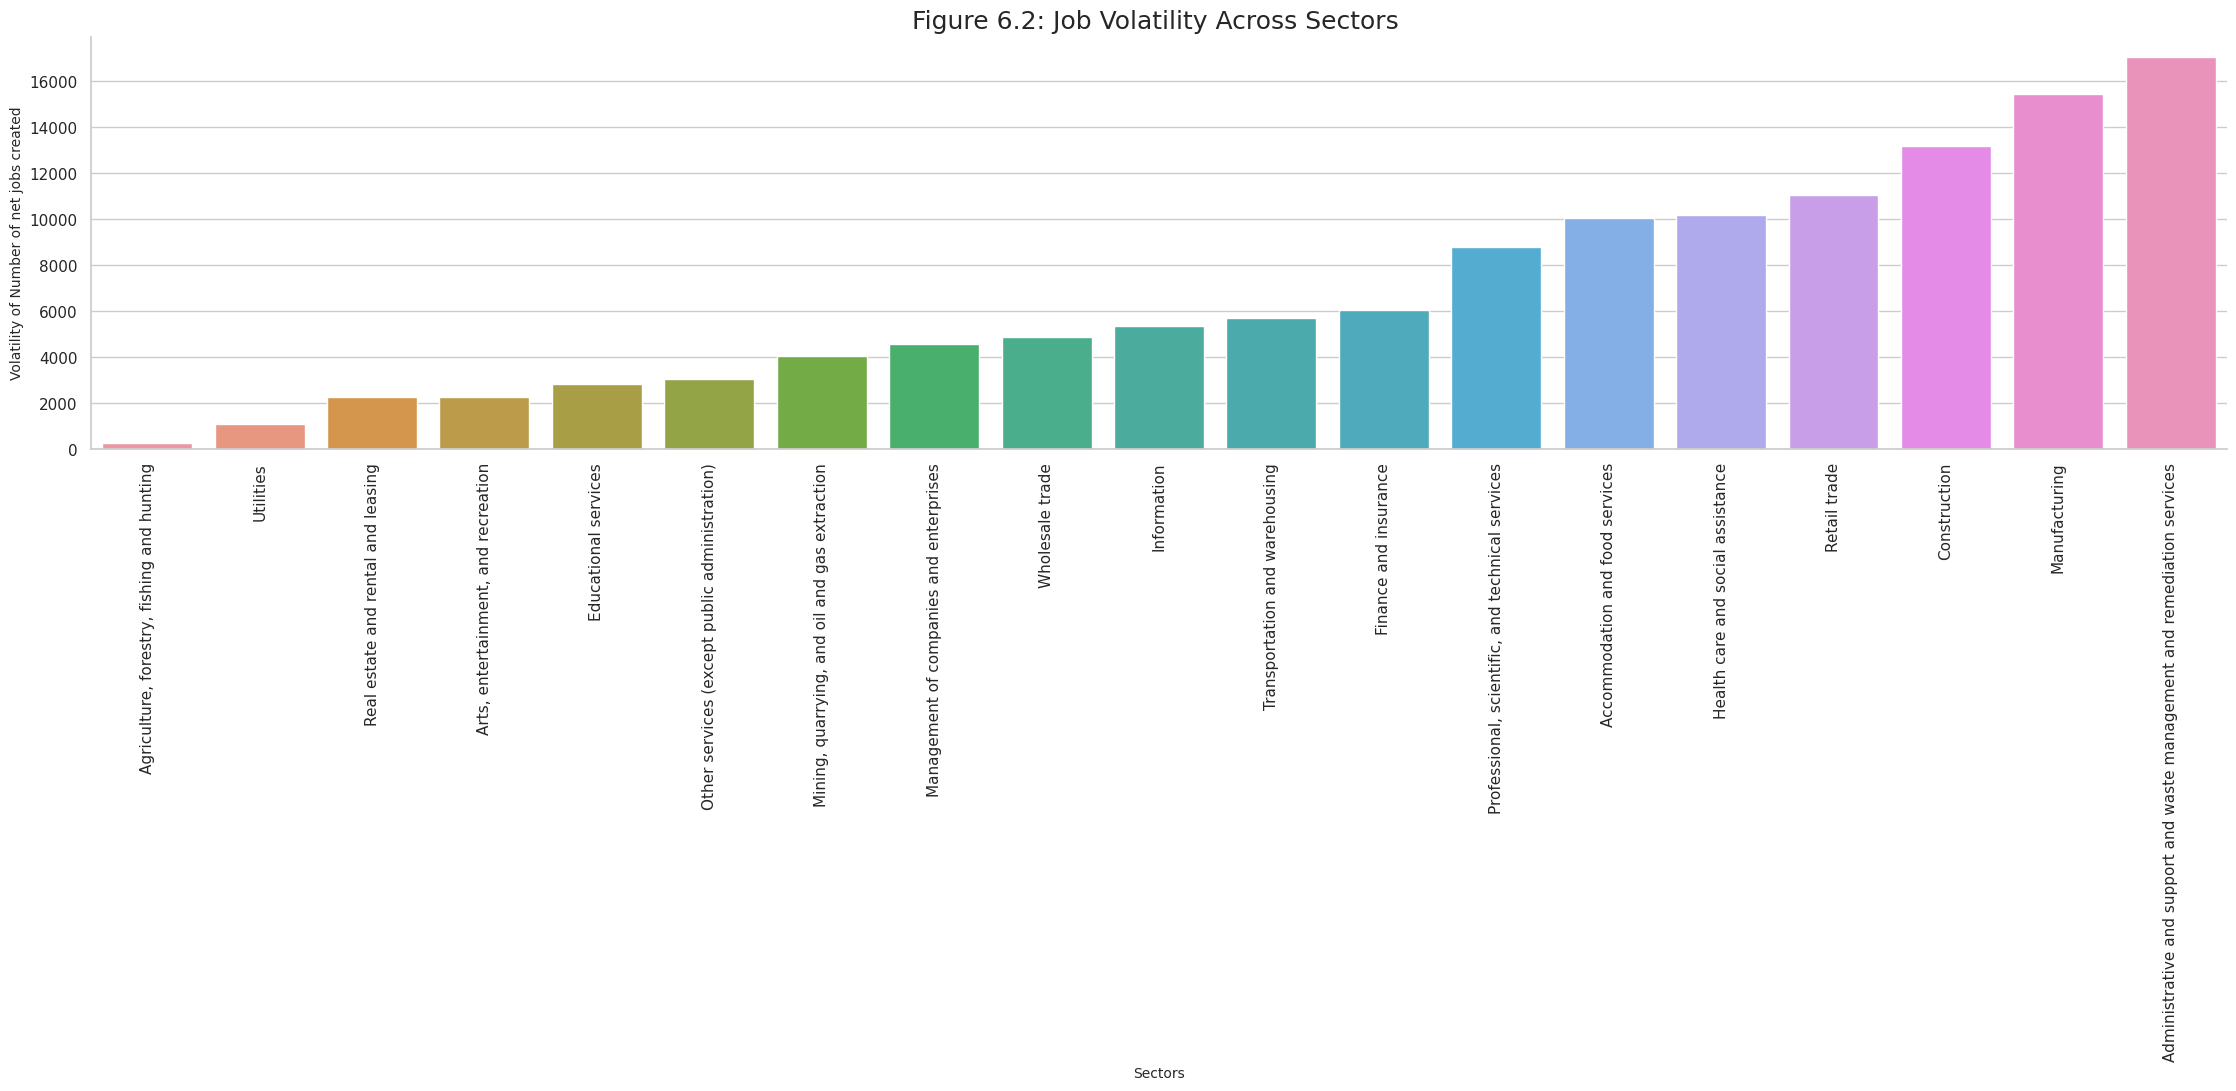

In [ ]:
#Plotting the bar plot
df_volatility = year_00_20[year_00_20["Geographic Area Name"] != "United States"]
df_volatility = df_volatility[df_volatility["Meaning of NAICS Code"] != "Total for all sectors"]

df_volatility = df_volatility.groupby(["Meaning of NAICS Code"])["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"].std()
df_volatility = pd.DataFrame({"Volatility":df_volatility})
df_volatility.reset_index(inplace = True)
df_volatility_by_sector=df_volatility.sort_values(by='Volatility', ascending=True)

top5_volatility_by_sector = df_volatility_by_sector.nlargest(5,"Volatility")
bottom5_volatility_by_sector = df_volatility_by_sector.nsmallest(5,"Volatility")

fig1=sns.catplot(x="Meaning of NAICS Code", y="Volatility", data=df_volatility_by_sector,kind="bar", aspect=5);
fig1.set_xticklabels(rotation=90);
plt.ylabel('Volatility of Number of net jobs created', fontsize=10);
plt.xlabel('Sectors', fontsize=10)
plt.title("Figure 6.2: Job Volatility Across Sectors ", fontsize=18);



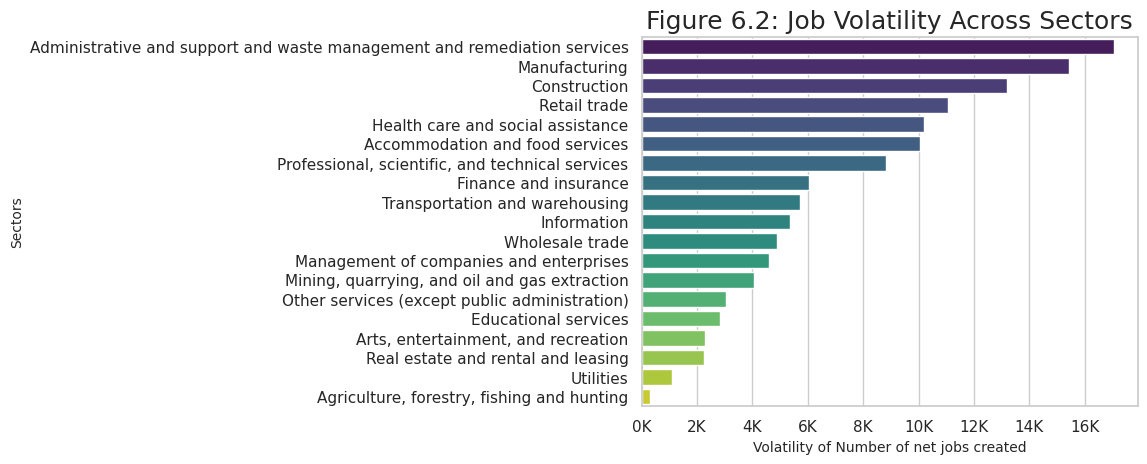

In [ ]:

df_volatility = year_00_20[year_00_20["Geographic Area Name"] != "United States"]
df_volatility = df_volatility[df_volatility["Meaning of NAICS Code"] != "Total for all sectors"]

df_volatility = df_volatility.groupby(["Meaning of NAICS Code"])["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"].std()
df_volatility = pd.DataFrame({"Volatility":df_volatility})
df_volatility.reset_index(inplace = True)
df_volatility_by_sector=df_volatility.sort_values(by='Volatility', ascending=True)


df_volatility_by_sector = df_volatility_by_sector.sort_values(by='Volatility', ascending=False)
fig1 = sns.barplot(y="Meaning of NAICS Code", x="Volatility", data=df_volatility_by_sector, orient="h", palette="viridis")

fig1.set_yticklabels(df_volatility_by_sector["Meaning of NAICS Code"], rotation=0)
def format_thousands(x, pos):
    return '{:,.0f}K'.format(x / 1000)

formatter = FuncFormatter(format_thousands)
fig1.xaxis.set_major_formatter(formatter)

plt.xlabel('Volatility of Number of net jobs created', fontsize=10)
plt.ylabel('Sectors', fontsize=10)
plt.title("Figure 6.2: Job Volatility Across Sectors", fontsize=18)

plt.show()


**Insights  from the bar plot**

This graphs is clear in terms of the volatality in each sector.

**Hence, answering the questions - Agriculture, Utilities and Educational sectors were the least and Admin, Manufacturing and Construction were the most affected by the recession period.**

As we can see from the plot above, the **construction** sector took a major hit with the recession. The same can be verified with a report from CNBC  https://www.cnbc.com/2012/06/01/Industries-Hit-Hardest-by-the-Recession.html

## 6.3





<ipython-input-37-f9bdabece3ab>:17: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-f9bdabece3ab>:18: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-f9bdabece3ab>:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-37-f9bdabece3ab>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




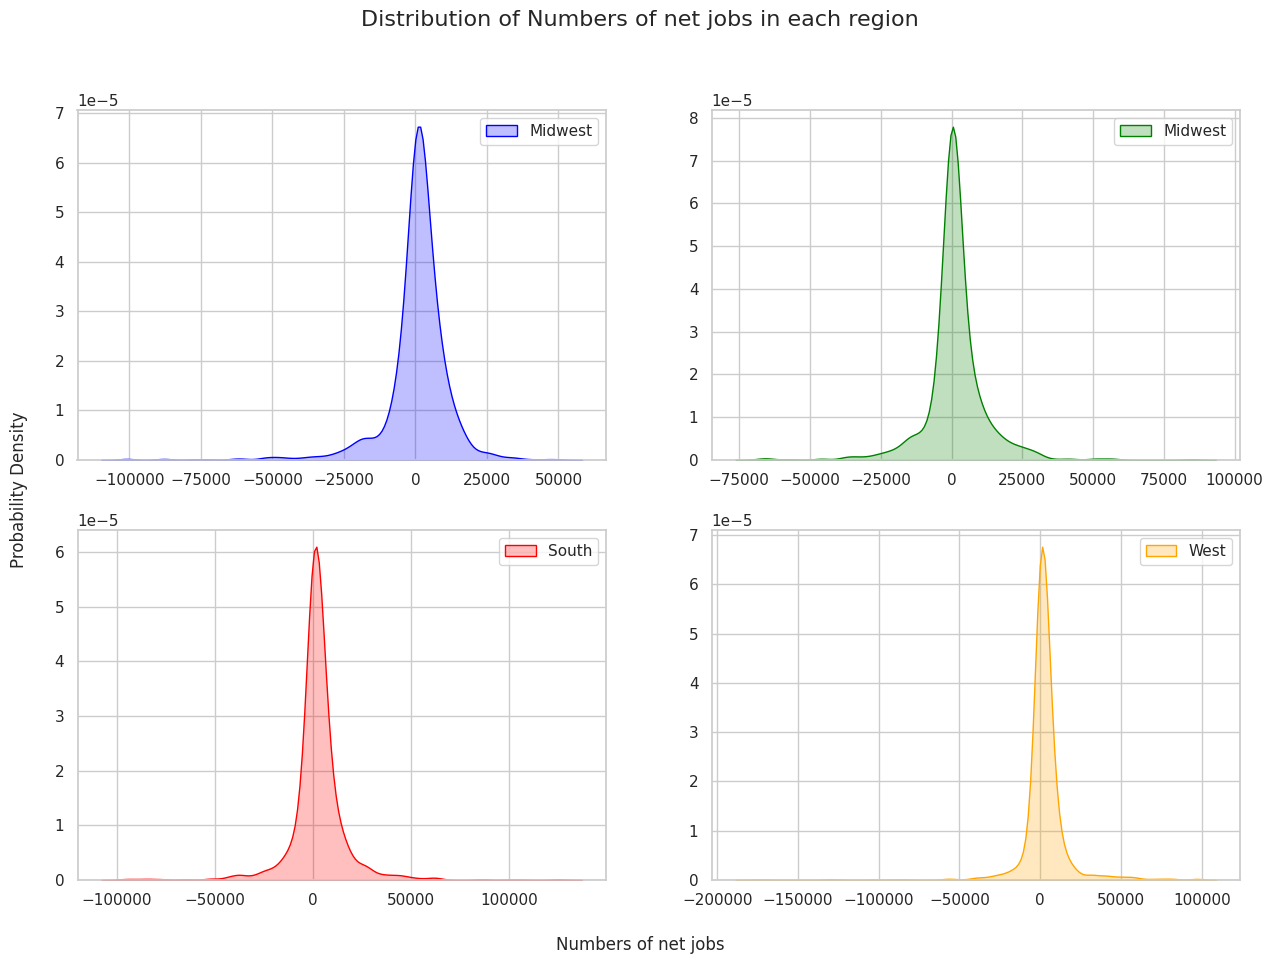

In [ ]:
df_volatility = year_00_20[year_00_20["Geographic Area Name"] != "United States"]
df_volatility = df_volatility[df_volatility["Meaning of NAICS Code"] != "Total for all sectors"]

df_volatility = df_volatility[(df_volatility["Meaning of NAICS Code"] == "Manufacturing") | (df_volatility["Meaning of NAICS Code"] == "Administrative and support and waste management and remediation services")
| (df_volatility["Meaning of NAICS Code"] == "Construction") | (df_volatility["Meaning of NAICS Code"] == "Retail trade") | (df_volatility["Meaning of NAICS Code"] == "Health care and social assistance")]
df_volatility.loc[df_volatility["Meaning of NAICS Code"] == "Administrative and support and waste management and remediation services",'Meaning of NAICS Code'] = 'Administrative and other services'


# Created 4 DataFrames for each regions
df_volatility_Midwest = df_volatility[df_volatility["Region"] == "Midwest"]
df_volatility_Northeast = df_volatility[df_volatility["Region"] == "Northeast"]
df_volatility_South = df_volatility[df_volatility["Region"] == "South"]
df_volatility_West = df_volatility[df_volatility["Region"] == "West"]

# Create a subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.kdeplot(df_volatility_Midwest["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"],ax=axes[0,0], shade=True, color="blue", label="Midwest",fill=True)
sns.kdeplot(df_volatility_Northeast["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"],ax=axes[0,1], shade=True, color="green", label="Midwest",fill=True)
sns.kdeplot(df_volatility_South["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"],ax=axes[1,0], shade=True, color="red", label="South",fill=True)
sns.kdeplot(df_volatility_West["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"],ax=axes[1,1], shade=True, color="orange", label="West",fill=True)

# Set x & y label to disappear
axes[0, 0].set(xlabel=None)
axes[0, 1].set(xlabel=None)
axes[1, 0].set(xlabel=None)
axes[1, 1].set(xlabel=None)
axes[0, 0].set(ylabel=None)
axes[0, 1].set(ylabel=None)
axes[1, 0].set(ylabel=None)
axes[1, 1].set(ylabel=None)

'''
# Calculated the Net jobs number median for the each regions
median_df_volatility_Midwest = df_volatility_Midwest["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"].median()
median_df_volatility_Northeast = df_volatility_Northeast["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"].median()
median_df_volatility_South = df_volatility_South["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"].median()
median_df_volatility_West = df_volatility_West["Number of net jobs created from expanding/contracting and opening/closing establishments during the last 12 months"].median()
'''
#Set Legend
'''
axes[0, 0].axvline(median_df_volatility_Midwest, color='blue', linestyle='dashed', linewidth=2, label='Median - Midwest')
axes[0, 1].axvline(median_df_volatility_Northeast, color='blue', linestyle='dashed', linewidth=2, label='Median - Northeast')
axes[1, 0].axvline(median_df_volatility_South, color='blue', linestyle='dashed', linewidth=2, label='Median - South')
axes[1, 1].axvline(median_df_volatility_West, color='blue', linestyle='dashed', linewidth=2, label='Median - West')
'''
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()
axes[1, 1].legend();

#set Title
fig.suptitle('Distribution of Numbers of net jobs in each region', fontsize=16)
fig.text(0.5, 0.04, 'Numbers of net jobs', ha='center', fontsize=12)
fig.text(0.08, 0.5, 'Probability Density', va='center', rotation='vertical', fontsize=12);

plt.show();

In [ ]:
df_volatility = year_00_20[year_00_20["Geographic Area Name"] != "United States"]
df_volatility = df_volatility[df_volatility["Meaning of NAICS Code"] != "Total for all sectors"]

df_volatility = df_volatility[(df_volatility["Meaning of NAICS Code"] == "Manufacturing") | (df_volatility["Meaning of NAICS Code"] == "Administrative and support and waste management and remediation services")
| (df_volatility["Meaning of NAICS Code"] == "Construction") | (df_volatility["Meaning of NAICS Code"] == "Retail trade") | (df_volatility["Meaning of NAICS Code"] == "Health care and social assistance")]
df_volatility.loc[df_volatility["Meaning of NAICS Code"] == "Administrative and support and waste management and remediation services",'Meaning of NAICS Code'] = 'Administrative and other services'



TenYearCHD = df_clean['TenYearCHD'].value_counts()
plt.pie(TenYearCHD, labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('TenYearCHD vs. Non-TenYearCHD')
plt.show()








NameError: ignored

# **7. Studying the effect of Economic Events on Jobs across Sectors**

## 7.1

## 7.2

# **8. Analyzing the Rate of Firm Deaths (closures) across Sectors and the trailing effect on GDP across States.**

## 8.1 Understanding the correlation between Firm Deaths and GDP between 2000 and 2020



Moving forward, we're keen to see how the death of firms has affected the GDP on a highlevel. So by the end of this analysis we'll try to answer the following question

**Question -  What is the correlation between the death of firms and GDP?**
In other words, how is GDP affected by the death of firms over the years?

In [ ]:
df_merged_us = df_merged[(df_merged["Year"]>=2000)&(df_merged["Year"]<=2020)]
df_merged_us = df_merged_us[df_merged_us["Geographic Area Name"] == "United States"]
df_merged_us = df_merged_us[df_merged_us["Meaning of NAICS Code"] == "Total for all sectors"]

# Sample data for firm deaths and GDP
years = df_merged_us['Year']
firm_deaths = df_merged_us['Number of firms that exited during the last 12 months']
gdp = df_merged_us['GDP']


fig, ax1 = plt.subplots(figsize=(10, 8))

# Ploting Number of firms that exited during the last 12 months
ax1.set_xlabel('Year')
ax1.set_ylabel('Firms that Exited', color='#FF0000')
ax1.plot(years, firm_deaths, color='#FF0000', marker='o', label='Firms that Exited', linewidth=2.5)
ax1.tick_params(axis='y', labelcolor='#FF0000')

#Trend Analysis of Number of firms that exited during the last 12 months
slope_deaths, intercept_deaths, _, _, _ = linregress(years, firm_deaths)
trend_deaths = slope_deaths * years + intercept_deaths
ax1.plot(years, trend_deaths, linestyle='--', color='#FF0000', label='Trend (Firm Deaths)')

# Second y-axis to plot GDP
ax2 = ax1.twinx()
ax2.set_ylabel('GDP (USD Trillion)', color='blue')
ax2.plot(years, gdp, color='blue', marker='v', label='GDP', linewidth=2.5)
ax2.tick_params(axis='y', labelcolor='blue')

# Calculate and plot the trendline for GDP
slope_gdp, intercept_gdp, _, _, _ = linregress(years, gdp)
trend_gdp = slope_gdp * years + intercept_gdp
ax2.plot(years, trend_gdp, linestyle=':', color='blue', label='Trend (GDP)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Add a title and labels
plt.title('Figure 8.1: Firm Deaths and GDP Over Time')
plt.xlabel('Year')
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Formating x-axis labels
for ax in axes.flat:
    ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))




# Display the plot
ax1.grid(False)
ax2.grid(False)
plt.show();


**Insights  from the lineplot**

The above plot is a clear indication of the inverse correlation between the number of firms deaths and the GDP measured over a period of time.
The highest and lowest of the Firm Deaths and Real GDP, respectively, are witnessed during the recession time frame of 2007-2010.


## 8.2

In [ ]:
df_industries = df_merged.copy()
primary_industries = ['Agriculture, forestry, fishing and hunting', 'Mining, quarrying, and oil and gas extraction', 'Utilities']
production_and_manufacturing = ['Construction', 'Manufacturing']
services_and_tech = ['Wholesale trade', 'Retail trade', 'Transportation and warehousing', 'Information']
other_services = ['Finance and insurance', 'Real estate and rental and leasing', 'Professional, scientific, and technical services', 'Management of companies and enterprises',
                             'Administrative and support and waste management and remediation services', 'Educational services', 'Health care and social assistance', 'Arts, entertainment, and recreation',
                             'Accommodation and food services', 'Other services (except public administration)']

def categorizar_sector(sector):
    if sector in primary_industries:
        return 'Primary Industries'
    elif sector in production_and_manufacturing:
        return 'Production and Manufacturing Industries'
    elif sector in services_and_tech:
        return 'Services and Tech Industries'
    elif sector in other_services:
        return 'Other Services'
    else:
        return 'Others'

df_industries['Industry_Category'] = df_industries['Meaning of NAICS Code'].apply(categorizar_sector)


primary_industries = df_industries[df_industries["Industry_Category"]=="Primary Industries"]
production_and_manufacturing = df_industries[df_industries["Industry_Category"]=="Production and Manufacturing Industries"]
services_and_tech = df_industries[df_industries["Industry_Category"]=="Services and Tech Industries"]
other_services = df_industries[df_industries["Industry_Category"]=="Other Services"]


output_notebook()


fig = figure(x_axis_label=" Firms that Exited", y_axis_label="Number of employees", title="Firms that Exited")
fig.yaxis.formatter = NumeralTickFormatter(format='0,0')
fig.xaxis.formatter = NumeralTickFormatter(format='0,0')
primary_industries_source = ColumnDataSource(data=primary_industries)
production_and_manufacturing_source = ColumnDataSource(data=production_and_manufacturing)
services_and_tech_source = ColumnDataSource(data=services_and_tech)
other_services_source = ColumnDataSource(data=other_services)


primary_industries_glyph = fig.circle(x="Number of firms that exited during the last 12 months", y="Number of employees", color="red", size=7, source=primary_industries_source)
production_and_manufacturing_glyph = fig.circle(x="Number of firms that exited during the last 12 months", y="Number of employees", color="red", size=7, source=production_and_manufacturing_source)
services_and_tech_glyph = fig.circle(x="Number of firms that exited during the last 12 months", y="Number of employees", color="red", size=7, source=services_and_tech_source)
other_services_glyph = fig.circle(x="Number of firms that exited during the last 12 months", y="Number of employees", color="red", size=7, source=other_services_source)


production_and_manufacturing_glyph.visible = False
services_and_tech_glyph.visible = False
other_services_glyph.visible = False

# Define la lógica para cambiar la visibilidad de los glyphs
menu = ["Primary Industries", "Production and Manufacturing Industries", "Services and Tech Industries", "Other Services"]
callback = CustomJS(args=dict(scatter1=primary_industries_glyph, scatter2=production_and_manufacturing_glyph, scatter3=services_and_tech_glyph, scatter4=other_services_glyph),
                    code="""
                            scatter1.visible = true;
                            scatter2.visible = true;
                            scatter3.visible = true;
                            scatter4.visible = true;
                            if (this.value == "Primary Industries") {
                                scatter2.visible = false;
                                scatter3.visible = false;
                                scatter4.visible = false;
                            } else if (this.value == "Production and Manufacturing Industries") {
                                scatter1.visible = false;
                                scatter3.visible = false;
                                scatter4.visible = false;
                            } else if (this.value == "Services and Tech Industries") {
                                scatter1.visible = false;
                                scatter2.visible = false;
                                scatter4.visible = false;
                            } else if (this.value == "Other Services") {
                                scatter1.visible = false;
                                scatter2.visible = false;
                                scatter3.visible = false;
                            }
                            """)

menu_select = Select(options=menu, value="Primary Industries", title="Industry Category")
menu_select.js_on_change("value", callback)
layout = column(menu_select, fig)
show(layout)


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Legend, LegendItem, DatetimeTickFormatter
from bokeh.models.widgets import Select
from bokeh.layouts import column
from bokeh.io import output_notebook, push_notebook, curdoc
from bokeh.models import CustomJS


df_industries = df_merged.copy()
df_industries = df_industries[(df_industries["Year"] >= 2000) & (df_industries["Year"] <= 2020)]

primary_industries = ['Agriculture, forestry, fishing and hunting', 'Mining, quarrying, and oil and gas extraction', 'Utilities']
production_and_manufacturing = ['Construction', 'Manufacturing']
services_and_tech = ['Wholesale trade', 'Retail trade', 'Transportation and warehousing', 'Information']
other_services = ['Finance and insurance', 'Real estate and rental and leasing', 'Professional, scientific, and technical services', 'Management of companies and enterprises',
                  'Administrative and support and waste management and remediation services', 'Educational services', 'Health care and social assistance', 'Arts, entertainment, and recreation',
                  'Accommodation and food services', 'Other services (except public administration)']

def categorizar_sector(sector):
    if sector in primary_industries:
        return 'Primary Industries'
    elif sector in production_and_manufacturing:
        return 'Production and Manufacturing Industries'
    elif sector in services_and_tech:
        return 'Services and Tech Industries'
    elif sector in other_services:
        return 'Other Services'
    else:
        return 'Others'

df_industries['Industry_Category'] = df_industries['Meaning of NAICS Code'].apply(categorizar_sector)

df_primary_industries = df_industries[df_industries["Industry_Category"] == "Primary Industries"].groupby(["Industry_Category", "Year"])[["Number of firms that exited during the last 12 months"]].sum().reset_index()
df_production_and_manufacturing = df_industries[df_industries["Industry_Category"] == "Production and Manufacturing Industries"].groupby(["Industry_Category", "Year"])[["Number of firms that exited during the last 12 months"]].sum().reset_index()
df_services_and_tech = df_industries[df_industries["Industry_Category"] == "Services and Tech Industries"].groupby(["Industry_Category", "Year"])[["Number of firms that exited during the last 12 months"]].sum().reset_index()
df_other_services = df_industries[df_industries["Industry_Category"] == "Other Services"].groupby(["Industry_Category", "Year"])[["Number of firms that exited during the last 12 months"]].sum().reset_index()


output_notebook()


fig = figure(x_axis_label="Year", y_axis_label="Firms that Exited", title="Firms that Exited")
fig.yaxis.formatter.use_scientific = False
fig.yaxis.formatter = NumeralTickFormatter(format='0,0')

primary_industries_source = ColumnDataSource(data=df_primary_industries)
production_and_manufacturing_source = ColumnDataSource(data=df_production_and_manufacturing)
services_and_tech_source = ColumnDataSource(data=df_services_and_tech)
other_services_source = ColumnDataSource(data=df_other_services)

primary_industries_glyphs = fig.line(x="Year", y="Number of firms that exited during the last 12 months", color="red", source=primary_industries_source, line_width=2)
production_and_manufacturing_glyphs = fig.line(x="Year", y="Number of firms that exited during the last 12 months", color="green", source=production_and_manufacturing_source, line_width=2)
services_and_tech_glyphs = fig.line(x="Year", y="Number of firms that exited during the last 12 months", color="blue", source=services_and_tech_source, line_width=2)
other_services_glyphs = fig.line(x="Year", y="Number of firms that exited during the last 12 months", color="orange", source=other_services_source, line_width=2)


callback = CustomJS(args=dict(line1=primary_industries_glyphs, line2=production_and_manufacturing_glyphs, line3=services_and_tech_glyphs, line4=other_services_glyphs),
                    code="""
                            line1.visible = true;
                            line2.visible = true;
                            line3.visible = true;
                            line4.visible = true;

                            if (this.value == "Primary Industries") {
                                line2.visible = false;
                                line3.visible = false;
                                line4.visible = false;
                            } else if (this.value == "Production and Manufacturing Industries") {
                                line1.visible = false;
                                line3.visible = false;
                                line4.visible = false;
                            } else if (this.value == "Services and Tech Industries") {
                                line1.visible = false;
                                line2.visible = false;
                                line4.visible = false;
                            } else if (this.value == "Other Services") {
                                line1.visible = false;
                                line2.visible = false;
                                line3.visible = false;
                            }
                            """)

production_and_manufacturing_glyphs.visible = False
services_and_tech_glyphs.visible = False
other_services_glyphs.visible = False

menu_select = Select(options=["Primary Industries", "Production and Manufacturing Industries", "Services and Tech Industries", "Other Services"], value="Primary Industries", title="Industry Category")
menu_select.js_on_change("value", callback)

layout = column(menu_select, fig)
show(layout)


## 8.3

# **9. Conclusions**

*Unraveling the US Economy (2000-2020)*

Our journey through the US economy from 2000 to 2020 unveiled some fascinating stories. One of the most striking tales was the dip during the 2008 recession, impacting both jobs and the overall economy. Although GDP and the number of businesses grew since 2000, job creation didn't keep up.

When we looked closer at the recession years, we discovered that some job sectors remained stable, like Agriculture, Utilities, and Education, while others, such as Administrative, Manufacturing, and Construction, faced more ups and downs.

As we traveled through states and their GDP, some states consistently stood out as leaders, like New York, California, and Texas. Florida, in particular, impressed us with its nearly doubled GDP over the course.

Lastly, we explored how firm closures and GDP are connected. It turns out that when businesses struggled during the recession, it had a noticeable impact on the economy. The more firms closed, the lower the GDP.

In simple terms, our analysis illuminated the US economy's ups and downs, showcasing its resilience, differences between job sectors, and the tightrope walk between business health and economic prosperity. These insights provide us with valuable guidance as we navigate the complex world of economics.


# **10. Acknowledgments**

We would like to acknowledge the following  

1. ChatGPT from OpenAI for its assistance during the course of this project. ChatGPT aided us in three key instances:
* 		Plotting the Map Plot: ChatGPT provided guidance in understanding the approach to create and interpret map plots, enhancing the geographical aspect of our analysis.
* 		Highlighting Key Points: ChatGPT aided in highlighting the local maxima and minima an in our line graphs, making our insights more accessible and visually compelling.

* 		Graph Beautification: ChatGPT assisted in adjusting the formatting of float values for years on the X-axis, enhancing the clarity of several graphs.

2. Official documentation of Pandas, Numpy, Seaborn and Matplotlib for further clarification of functions/arguments.